In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import shap

c:\Users\LJM\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load Data
file_path = './data/random_forest_training.xlsx'
data = pd.read_excel(file_path)

In [3]:
# Data Preprocessing
# Drop non-numeric columns that are not needed for analysis
company_info = data.iloc[:, :3]  # Assuming first three columns are Company Name, Industry, and Year
X = data.iloc[:, 3:].drop(columns=['predicted_score'])  # Features for analysis
y = data['predicted_score']  # Target variable

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [5]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
# Evaluate Model
r2_score = rf.score(X_test, y_test)
print(f'Model R^2 Score: {r2_score}')

Model R^2 Score: 0.0891985695708769


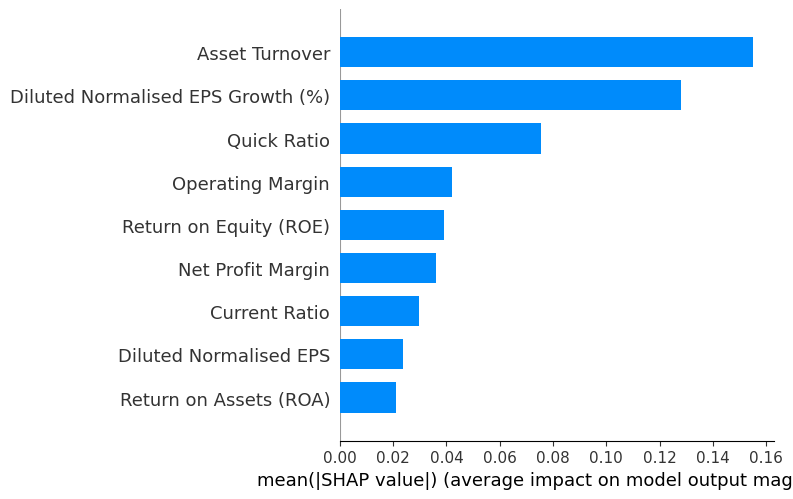

In [7]:
# Feature Importance Analysis using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train, check_additivity=False)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [8]:
# Save Feature Importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances for ESG Performance Scoring System:")
print(feature_importances)

Feature Importances for ESG Performance Scoring System:
Asset Turnover                       0.218323
Diluted Normalised EPS Growth (%)    0.197082
Quick Ratio                          0.137460
Net Profit Margin                    0.096240
Operating Margin                     0.091148
Return on Equity (ROE)               0.078702
Current Ratio                        0.066800
Return on Assets (ROA)               0.060539
Diluted Normalised EPS               0.053705
dtype: float64


In [9]:
top_3_features = feature_importances.head(3)
bottom_3_features = feature_importances.tail(3)

top_features_df = pd.DataFrame({'Feature': top_3_features.index, 'Importance': top_3_features.values})
bottom_features_df = pd.DataFrame({'Feature': bottom_3_features.index, 'Importance': bottom_3_features.values})

print("Top 3 Financial Variables with Highest Correlation:")
print(top_features_df)

print("Bottom 3 Financial Variables with Lowest Correlation:")
print(bottom_features_df)

Top 3 Financial Variables with Highest Correlation:
                             Feature  Importance
0                     Asset Turnover    0.218323
1  Diluted Normalised EPS Growth (%)    0.197082
2                        Quick Ratio    0.137460
Bottom 3 Financial Variables with Lowest Correlation:
                  Feature  Importance
0           Current Ratio    0.066800
1  Return on Assets (ROA)    0.060539
2  Diluted Normalised EPS    0.053705


In [10]:
top_features_df.to_csv("top_features_df.csv", index = False)

In [11]:
bottom_features_df.to_csv("bottom_features_df.csv", index = False)